In [98]:
import pandas as pd
import numpy as np
from modules import *

In [99]:
data = pd.read_csv("술 리뷰(죽향도가).csv", encoding='utf-8-sig')
data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
try : 
    data.columns = ['date', 'star','doc', 'name']
except:
    data.columns = ['date', 'star','doc']

In [100]:
data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
data.doc = data.doc.str.replace("럽고목","럽고 목")

data.doc

C:\Users\user\AppData\Local\Temp\ipykernel_18968\368851408.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_18968\368851408.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제


0       다른건 포장이 잘 되어서 왔는데 이건 다 새고 열자마자 막걸리냄새 진동해서맛은 맛있었어요
1       한여름에 막걸리를 배송 시키는데 아이스팩 작은거 달랑 하나 보내는게 맞는건가요 아이...
2       다시는 여기서 안시킬 생각입니다막걸리가 다 터져서 왔던데요 그냥 버렸어요저번 금계당...
3       뚜껑이 약간 오픈되어 있어서 흘러내려 있었네요 약간 흘러내리는 정도라 그냥 받은날 ...
4                                        그냥 저는 개인적으로별로에요 
                              ...                        
5675       다양한술을 집에서 편하게 주문가능하기에 자주 주문합니다이번에도 즐겁게 마시겠읍니다 
5676                                          빠른 배송 감사합니당
5677    단맛은 있는데 꿀 단맛이어서 나쁘지 않아요 기분 나쁘지 않은 단맛이에요 인공감미료가...
5678                                       맛이 달고 청량감이 좋아요
5679                       시중에서 흔히 볼 수 없었는데 적당한 당도가 좋았습니다
Name: doc, Length: 5680, dtype: object

In [101]:
# 검토 후 추가 삭제 문구 적용
data.dropna(inplace=True)

In [102]:
# Nan 확인
data[data.doc.isnull()]

,date,star,doc


In [103]:
# data = data[data.doc.str.contains('맛|향|달|넘김|부드|단|도수|냄새')]
data.reset_index(drop=True, inplace=True)

In [104]:
len(data)

5679

In [105]:
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt

In [106]:
from nltk.util import everygrams

#원하는 태그 추출 & 불용어 제거
okt = Okt()

#불용어
stopwords = pd.read_csv('ko-stopwords.csv') #한국어불용어사전 불러오기
stopwords=list(stopwords['stopwords']) 
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다",
                 '에서','고','이다']) #불용어 추가

stopwords=set(stopwords) # 중복제거    

# 형태소 분석 함수 만들기
def okt_pos_tagging2(string):
    pos_words = okt.pos(string, stem=True, norm=True) # 형태소 분석. 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag 
             in ['Noun', 'Adjective', 'Verb','Adverb'] if word not in stopwords ]

    # n_gram 만들기
    egram = list(everygrams(words, min_len=1, max_len=1))
    egram_token = [' '.join(grams) for grams in egram]

    return egram_token

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) # 형태소 분석. 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag 
             in ['Noun', 'Adjective', 'Verb','Adverb'] if word not in stopwords ]

    return words



In [107]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x: okt_pos_tagging(x))
bow_vect = vect.fit_transform(data['doc'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [108]:
bow_vect.shape

(5679, 3422)

In [109]:
word_count_dict = dict(zip(word_list, count_list))

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [111]:
print(tf_idf_vect[0])

  (0, 3184)	0.21648904445727574
  (0, 2805)	0.4998587897072011
  (0, 2491)	0.2231615217269827
  (0, 2190)	0.2428838109774792
  (0, 1610)	0.3093440643400996
  (0, 1072)	0.13983495922438463
  (0, 1062)	0.17288000718553484
  (0, 1028)	0.15757632876311548
  (0, 649)	0.41476655719162586
  (0, 641)	0.28364082464293416
  (0, 545)	0.41476655719162586


In [112]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{649: '다르다', 3184: '포장', 2491: '자다', 2190: '오다', 641: '다', 1610: '새다', 1028: '막걸리', 545: '냄새', 2805:...


In [113]:
# 긍정 부정 라벨링 별점이 4이상이면 긍정 
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0

data['y'] = data['star'].apply(lambda x : rating_to_label(x))
len(data[data['y']==0])

214

In [114]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = data['y']

# positive_random_idx = data[data['y']==1].sample(48, random_state=12).index.tolist()
# negative_random_idx = data[data['y']==0].sample(48, random_state=12).index.tolist()

# random_idx = positive_random_idx + negative_random_idx
# x = tf_idf_vect[random_idx]
# y = data['y'][random_idx]


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [115]:
x.shape,y.shape

((5679, 3422), (5679,))

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression()
lr.fit(x, y)

# predict in test set
y_pred = lr.predict(x)

In [117]:
print('accuracy: %.4f' % accuracy_score(y, y_pred))
print('precision: %.4f' % precision_score(y, y_pred))
print('recall: %.4f' % recall_score(y, y_pred))
print('F1: %.4f' % f1_score(y, y_pred))


accuracy: 0.9630
precision: 0.9630
recall: 1.0000
F1: 0.9811


In [118]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)

In [119]:
weight_df = pd.DataFrame(columns=['weight'])
# 단어별 가중치 확인 
for coef in coef_neg_index[:]:
    weight_df.loc[invert_index_vectorizer[coef[1]]] = coef[0]
    print(invert_index_vectorizer[coef[1]],coef[0])

아니다 -2.9071032741547027
그냥 -2.4898829837291427
달다 -2.321052356589118
취향 -2.1651391004458427
새다 -1.93702137019585
밍밍 -1.8202292768828492
보내다 -1.6979506102884239
입맛 -1.4883713630338375
모르다 -1.4266645412282946
개인 -1.3002689770818485
특별하다 -1.2655113243296077
터지다 -1.2624021833771635
느껴지다 -1.0940299398997435
해보다 -1.0526815961025384
많이 -1.0395310731926972
평범하다 -1.0252827730248373
이마트 -1.0198614798237
제품 -1.0192720122469339
실망 -1.0132258432391137
아예 -1.0089532697316643
여성 -1.00411752951702
냄새 -1.0020408494560578
별로 -0.9677457043988776
강하다 -0.9622768686311419
경험 -0.9459836746612675
전 -0.9429254972329225
느리다 -0.9190152660574781
일반 -0.9091567150217706
소백산 -0.8922858753881433
나서다 -0.8760417849684442
못 -0.8593208807339263
택배 -0.8527412861019563
걸죽 -0.8515640003290785
과정 -0.8379086465794853
어머님 -0.8099508814293135
생각 -0.7968763149698884
느낌 -0.7609262520462886
단맛 -0.7571484315549925
내용물 -0.7436957543234183
맛 -0.729204800873798
해 -0.7159466768697115
순위 -0.714393276104766
테 -0.7084096408997426
써다 -0.69

In [120]:
tokens = [] 

for i in data['doc']:
    token = okt_pos_tagging(i)
    tokens.append(token)

tokens

[['다르다', '포장', '자다', '오다', '다', '새다', '막걸리', '냄새', '진동', '맛', '맛있다'],
 ['한여름',
  '막걸리',
  '배송',
  '아이스팩',
  '작다',
  '달랑',
  '보내다',
  '맞다',
  '가요',
  '아이스팩',
  '다',
  '녹다',
  '스티로폼',
  '다',
  '깨다',
  '엉망',
  '스티로폼',
  '택배',
  '막',
  '던지다',
  '해도',
  '아이스팩',
  '실망',
  '스럽다',
  '소주',
  '맛있다',
  '재',
  '주문',
  '식',
  '배송',
  '보내다',
  '누가',
  '다시',
  '주문',
  '합',
  '약속',
  '없이',
  '먹다',
  '없다',
  '먹다',
  '맘',
  '다',
  '환불',
  '싶다'],
 ['다시다',
  '생각',
  '막걸리',
  '다',
  '터지다',
  '오다',
  '그냥',
  '버리다',
  '저번',
  '금계',
  '바랑',
  '아예',
  '다',
  '산화',
  '배송',
  '연속',
  '다',
  '망가지다',
  '상품',
  '보내다',
  '솔직하다',
  '돈',
  '아깝다'],
 ['뚜껑', '오픈', '흘러내리다', '흘러내리다', '정도', '그냥', '받다', '날', '마시다'],
 ['그냥', '개인', '별로'],
 ['너무', '달다', '입맛', '아니다'],
 ['박스',
  '다',
  '온',
  '막걸리',
  '포장',
  '뭔가',
  '싶다',
  '포장',
  '이렇게',
  '해주시',
  '배송',
  '과정',
  '당연하다',
  '다',
  '새다',
  '나오다',
  '없다',
  '병',
  '다',
  '새다',
  '물이',
  '가득하다',
  '막걸리',
  '배송',
  '이렇게',
  '해주시',
  '곳',
  '처음',
  '보다'],
 ['터지다', '오다', '막걸리', '새다',

In [121]:
from collections import Counter

# 토큰화된 단어 하나의 리스트로 만듦
all_tokens = []
for i in tokens:
    all_tokens = all_tokens + i

counted = Counter(all_tokens)

In [122]:
at_df = pd.DataFrame(columns=['mentioned'])

# 단어별 언급량 비율화 
for i,j in zip(counted.keys(),counted.values()):
    at_df.loc[i] = j/len(counted)

In [123]:
at_df = at_df.sort_values(by='mentioned',ascending=False)
at_df

,mentioned
맛있다,0.583577
좋다,0.531268
막걸리,0.512858
맛,0.373758
먹다,0.353010
...,...
향가,0.000292
드러나다,0.000292
강쇡주,0.000292
무섭다,0.000292


In [124]:
# tokens2 = []

# for i in tokens:
    
#     tag2=[]
    
#     for j in i:
#         tag1 = okt_pos_tagging(j)
#         tag2 = tag2 + tag1
    
#     tokens2.append(tag2)
    

In [125]:
print(len(data))
for j in range(3,6):
    n=0
    for i in counted.values():
        if i > j:
            n=n+1
    print(j, n)

5679
3 991
4 830
5 721


In [126]:
from gensim.models import Word2Vec

w2v = Word2Vec(tokens, vector_size= 300, window=2, min_count=3, epochs=20)
word_vectors = w2v.wv
vocabs = word_vectors.key_to_index
word_vectors_list = [word_vectors[v] for v in vocabs]


# 단어 추출에서 탈락시킬 단어
stopwords2 = ['나다', '안나', '이나', '기대하다', '나서다', '끝','싹','이나고','잇다','기대다','생각','기대',
            '랄','날','끄다','편이','끼','감','감다','기도','함','테','넘어가다','비다','느껴지다','진하다',
            '차다','약하다','도인','올라오다','일반','아니다','나다','넘어가다','비다','살짝','높다','도수','뒤','마지막',
            '넘기다','없다','요','도','더','집','않다','많이','느낌','만들다','먹기','자체','해','덜','들억다','히','도르다',
            '막히다','한식','김','개인','젤','상당하다','인상','확','입안'
            ,'안달','미가','풍','콤함','알코올','살아나다','면서','제게','인위','강하','긋다','콤해']

print(len(vocabs))

1255


In [127]:
a = w2v.wv.most_similar(positive=['목','넘김'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2

,언급비율,가중치
부드럽다,0.227937,1.584570
순하다,0.017534,0.457623
독하다,0.001753,0.041695
굉장하다,0.007013,-0.107111
깔끔하다,0.085622,1.668115
달콤하다,0.021625,0.280907
달달,0.204851,0.825554
마시기,0.018118,0.300066


In [128]:
a = w2v.wv.most_similar(positive=['끝맛','마시기','뒷맛','은은하다'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2


,언급비율,가중치
청량하다,0.003799,0.225217
텁텁,0.005260,0.097642
라이트,0.002922,0.251754
맑다,0.005845,0.041526
신맛,0.003507,0.127576


In [129]:
a = w2v.wv.most_similar(positive=['은은하다','특히'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2


,언급비율,가중치
스타일,0.007306,0.058971
담백하다,0.002046,0.111407
인공,0.004091,0.419974
라이트,0.002922,0.251754
감칠맛,0.001169,0.084289
묵직하다,0.004091,0.227613
산미,0.002630,0.131130


In [130]:
a = w2v.wv.most_similar(positive=['향','은은하다'],negative=['알콜'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2

,언급비율,가중치
달콤하다,0.021625,0.280907
꿀향,0.014611,-0.090218
적당하다,0.038866,0.988483
가볍다,0.045880,0.115731
부드럽다,0.227937,1.584570
쏘다,0.009936,0.079176
달달,0.204851,0.825554
순하다,0.017534,0.457623
끝맛,0.007598,-0.129112


In [131]:
a = w2v.wv.most_similar(positive=['느껴지다','향','냄새','은은하다'],negative=['알콜'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2

,언급비율,가중치
끝맛,0.007598,-0.129112
텁텁,0.005260,0.097642
톡,0.006429,0.077549
특유,0.008475,0.287575
쏘다,0.009936,0.079176
신맛,0.003507,0.127576


In [133]:
#디자인, 병모양, 이쁨, 이쁘다, 패키지, 설날, 크리스마스
a = w2v.wv.most_similar(positive=['선물','이쁘다','크리스마스'],negative=['알콜'])
a = [word for word, tag in a if word not in stopwords2]
a2 = pd.DataFrame(columns=['언급비율', '가중치'])

for i in a: 
    a2.loc[i] = [at_df.loc[i].item(),weight_df.loc[i].item()]
a2

,언급비율,가중치
주다,0.010228,-0.020854
감사,0.004091,0.226348
항상,0.015780,0.566826
아빠,0.008475,0.036679
생일,0.002338,0.122956
사다,0.042957,0.411007
해드리다,0.001461,0.061085
애용,0.007013,0.241713
지인,0.012858,0.209117
용,0.019579,0.348249


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


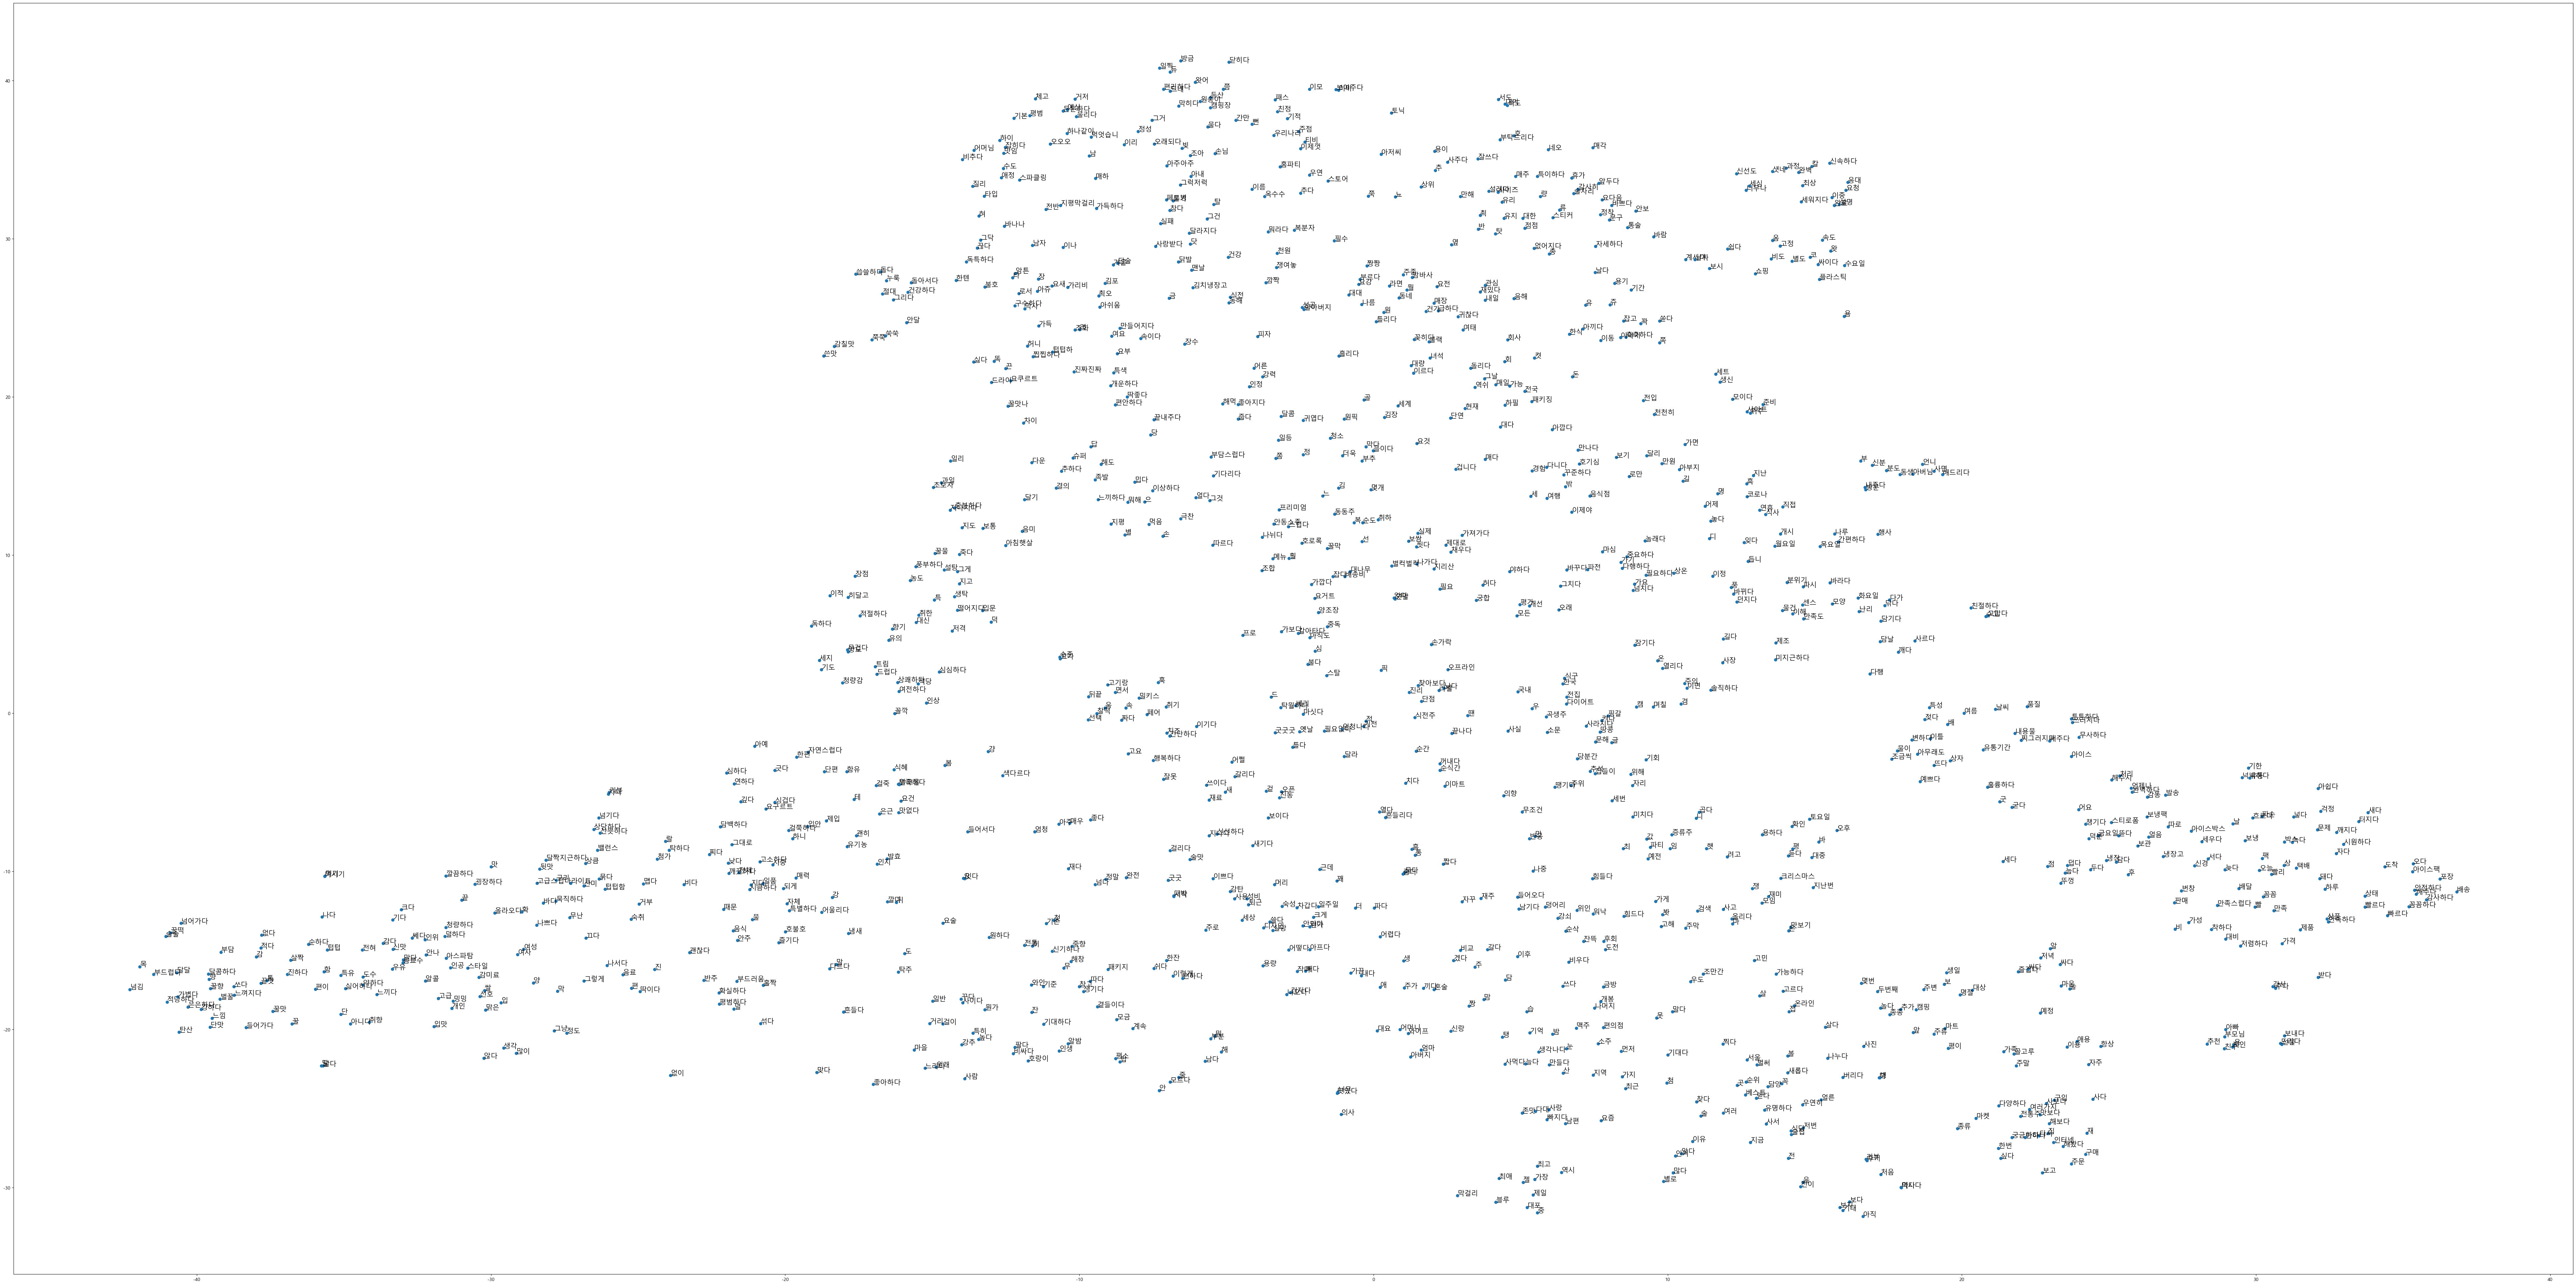

In [134]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

rc('font',family=font_name) # 한글 폰트

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(vocabs)
X = w2v.wv[vocab]

tsne = TSNE(n_components=2, perplexity=30 ,min_grad_norm=1e-4, n_iter=2000)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, columns=['x', 'y'])
df.index = vocab
df.shape

fig = plt.figure()
fig.set_size_inches(100, 50)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()